# Assignment No 14 : LSTM

### Resources :

- Thanks AAIC Team
- Google Search ,Kaggle,Sklearn
- KrushitReddy
- https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3428/assignment-try-various-cnn-networks-on-mnist-dataset/8/module-8-neural-networks-computer-vision-and-deep-learning
- https://github.com/krushithreddy
- https://scikit-learn.org/stable/index.html
- https://www.kaggle.com/

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import numpy
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [0]:
import pickle

with open('/content/gdrive/My Drive/Colab Notebooks/final.pkl', 'rb') as f:
    data = pickle.load(f)

In [4]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,CleanedSummary
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...,everi book educ
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...,love book miss hard cover version
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...,chicken soup rice month
138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great littl book read nice rhythm well good re...,good swingi rhythm read aloud
138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,book poetri month year goe month cute littl po...,great way learn month


In [5]:
data["Time"].sort_values()

138706     939340800
138683     940809600
417839     944092800
346055     944438400
417838     946857600
346116     947376000
346041     948240000
70688      948672000
346141     951523200
346094     959990400
417883     959990400
1146       961718400
1145       962236800
121041     965001600
138001     965779200
138017     965779200
346115     966297600
346102     970531200
138000     975974400
346078     977184000
346054     978134400
138018     982800000
417901     992217600
346037     997228800
346140    1001289600
138020    1003795200
346033    1004054400
138682    1009324800
333930    1010275200
346032    1012780800
             ...    
5472      1351209600
443952    1351209600
189914    1351209600
116874    1351209600
442739    1351209600
510670    1351209600
138478    1351209600
479033    1351209600
190494    1351209600
479530    1351209600
340517    1351209600
157477    1351209600
510455    1351209600
236715    1351209600
441646    1351209600
344476    1351209600
113341    135

In [0]:
data = data.tail(70000)

In [0]:
train = data.head(60000)
test = data.tail(10000)

In [0]:
x_train = train["CleanedText"]

In [0]:
y_train = train["Score"]
x_test = test["CleanedText"]

In [0]:
y_test = test["Score"]

In [11]:
x_train.shape

(60000,)

In [0]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)

X_train = tokenizer.texts_to_sequences(x_train)

In [0]:
X_test = tokenizer.texts_to_sequences(x_test)

In [14]:
print(X_train[33])
print(type(X_train[33]))
print(len(X_train[33]))

[11, 399, 81, 25, 47, 21, 1167, 1751, 97, 841, 148, 110, 3245, 484]
<class 'list'>
14


In [15]:
max_review_length = 400
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_train[33])

(60000, 400)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

In [0]:
import matplotlib.pyplot as plt
def plt_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x,vy,'b',label="Validation Loss")
  ax.plot(x,ty,'r',label="Train Loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()

#**1 LAYER-LSTM:**

In [26]:
top_words = 5000

embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 400, 32)           160000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16974235016419944510
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 14494547961730048904
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 14174836379046177974
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11276946637
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12284886780347192124
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [27]:

history = model.fit(X_train, y_train, nb_epoch=10, batch_size=200,validation_data=(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 247s 4ms/step - loss: 0.2983 - acc: 0.8837 - val_loss: 0.2102 - val_acc: 0.9206
Epoch 2/10
60000/60000 [==============================] - 248s 4ms/step - loss: 0.1894 - acc: 0.9270 - val_loss: 0.2042 - val_acc: 0.9193
Epoch 3/10
60000/60000 [==============================] - 249s 4ms/step - loss: 0.1736 - acc: 0.9332 - val_loss: 0.2095 - val_acc: 0.9202
Epoch 4/10
60000/60000 [==============================] - 242s 4ms/step - loss: 0.1622 - acc: 0.9366 - val_loss: 0.2163 - val_acc: 0.9203
Epoch 5/10
60000/60000 [==============================] - 242s 4ms/step - loss: 0.1516 - acc: 0.9422 - val_loss: 0.2166 - val_acc: 0.9168
Epoch 6/10
60000/60000 [==============================] - 245s 4ms/step - loss: 0.1432 - acc: 0.9454 - val_loss: 0.2229 - val_acc: 0.9162
Epoch 7/10
60000/60000 [==============================] - 248s 4ms/step - loss: 0.1319 - acc: 0.9494 - val_loss: 0.2358 - 

Test score: 0.2866777069292962
Test accuracy: 0.913


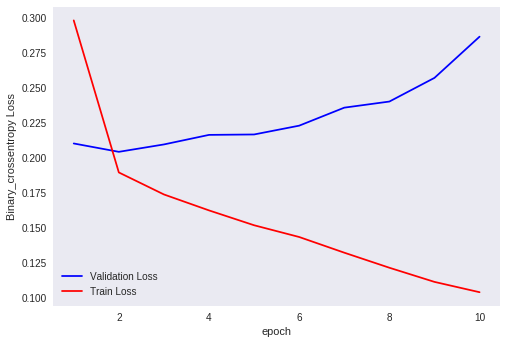

In [28]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

x = list(range(1,11))
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary_crossentropy Loss')

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#**2 LAYERS-LSTM:**

In [29]:
top_words = 5000

embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 400, 32)           160000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 400, 100)          53200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 293,701
Trainable params: 293,701
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
history = model.fit(X_train, y_train, nb_epoch=10, batch_size=200,validation_data=(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 490s 8ms/step - loss: 0.2854 - acc: 0.8878 - val_loss: 0.2121 - val_acc: 0.9174
Epoch 2/10
60000/60000 [==============================] - 498s 8ms/step - loss: 0.1925 - acc: 0.9252 - val_loss: 0.2074 - val_acc: 0.9207
Epoch 3/10
60000/60000 [==============================] - 512s 9ms/step - loss: 0.1722 - acc: 0.9342 - val_loss: 0.2063 - val_acc: 0.9181
Epoch 4/10
60000/60000 [==============================] - 512s 9ms/step - loss: 0.1580 - acc: 0.9394 - val_loss: 0.2469 - val_acc: 0.9166
Epoch 5/10
60000/60000 [==============================] - 510s 9ms/step - loss: 0.1481 - acc: 0.9436 - val_loss: 0.2270 - val_acc: 0.9155
Epoch 6/10
60000/60000 [==============================] - 496s 8ms/step - loss: 0.1324 - acc: 0.9505 - val_loss: 0.2314 - val_acc: 0.9162
Epoch 7/10
60000/60000 [==============================] - 489s 8ms/step - loss: 0.1199 - acc: 0.9559 - val_loss: 0.2565 - 

Test score: 0.32193974486775695
Test accuracy: 0.9135


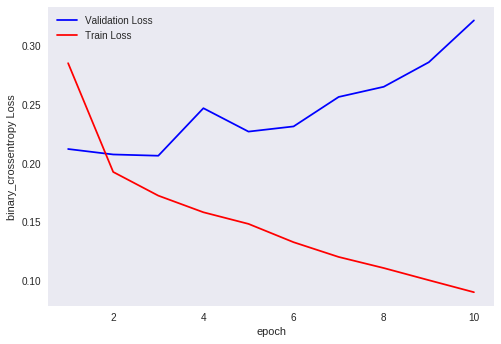

In [31]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

x = list(range(1,11))
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('binary_crossentropy Loss')

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Conclution :

- Using another layer of LSTM their is not a good idea. 
- As we can see their is no change in the error plots and 2 Layers of LSTM is computationally more expensive than 1 Layer LSTM and both the architectures are overfitting. 
